In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# First Import

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os

In [ ]:
print(tf.__version__)

2.3.0


# Variables

In [ ]:
img_height = 40
img_width = 60
batch_size = 32

Change the `base_dir` according to your directory

In [ ]:
base_dir = "/content/gdrive/My Drive/rockpaperscissors"

# Create Dataset

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = "%s/dataset"%(base_dir)
train_datagen = ImageDataGenerator( rescale = 1.0/255,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest',
                                      validation_split=0.4)

validation_datagen = ImageDataGenerator(rescale = 1.0/255,
                                        validation_split=0.4)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width),
                                                    subset='training')

validation_generator = validation_datagen.flow_from_directory(train_dir,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width),
                                                    subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
os.listdir(train_dir)

['rock', 'scissors', 'paper']

## Show Images

[Batch, batched images and labels, image and label]

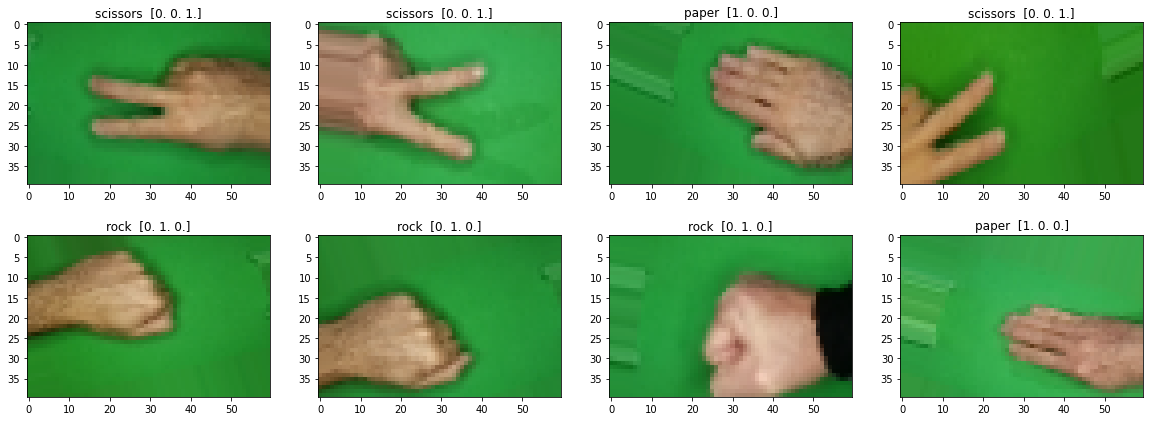

In [ ]:
for i in range(3):
    x1,y1 = next(train_generator)

plt.figure(figsize=(20,15))
idx=1
for i in range(8):
    plt.subplot(4,4,idx)
    plt.imshow(x1[i])
    
    if y1[i][0]==1 and y1[i][1]==0 and y1[i][2]==0:
      classes = 'paper'
    elif y1[i][0]==0 and (y1[i][1]==1 and y1[i][2]==0):
      classes = 'rock'
    else:
      classes = 'scissors'

    labels = str(y1[i])
    plt.title(classes + '  ' + labels)
    idx+=1

# Training

## Model

In [ ]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (5,5), activation=tf.nn.relu,input_shape=(img_height, img_width, 3)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu,padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu,padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation = tf.nn.softmax)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 36, 56, 64)        4864      
_________________________________________________________________
batch_normalization (BatchNo (None, 36, 56, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 36, 56, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 18, 28, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 14, 128)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16128)             0

## Callback

In [ ]:
class CustomCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc') > 0.97):
      print("\nAccuracy reached 97%.\n")
      self.model.stop_training = True

Callbacks = [
   
    tf.keras.callbacks.EarlyStopping(monitor='val_acc',
                                     patience=5,
                                     verbose=1,
                                    ),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_acc:.4f}.h5'),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc',
                                          patience=3, 
                                          verbose=1,
                                          factor=0.5,
                                          min_lr=0.00001
                                         ),
    CustomCallback()
]

## Train

In [ ]:
epochs = 25
model.compile(loss = 'categorical_crossentropy', 
              optimizer= tf.keras.optimizers.RMSprop(), 
              metrics=['acc'])

history = model.fit(train_generator,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = validation_generator,
                    callbacks = [Callbacks])

Epoch 1/25
42/42 [==============================] - 470s 11s/step - loss: 1.7630 - acc: 0.5320 - val_loss: 1.0673 - val_acc: 0.5240
Epoch 2/25
42/42 [==============================] - 10s 235ms/step - loss: 0.5661 - acc: 0.7907 - val_loss: 1.0270 - val_acc: 0.5572
Epoch 3/25
42/42 [==============================] - 10s 233ms/step - loss: 0.4758 - acc: 0.8417 - val_loss: 0.8760 - val_acc: 0.6888
Epoch 4/25
42/42 [==============================] - 10s 235ms/step - loss: 0.2950 - acc: 0.9003 - val_loss: 0.6549 - val_acc: 0.9588
Epoch 5/25
42/42 [==============================] - 10s 235ms/step - loss: 0.2687 - acc: 0.9148 - val_loss: 0.6504 - val_acc: 0.6442
Epoch 6/25
42/42 [==============================] - 10s 235ms/step - loss: 0.2461 - acc: 0.9224 - val_loss: 0.2950 - val_acc: 0.9760
Epoch 7/25
42/42 [==============================] - 10s 240ms/step - loss: 0.2516 - acc: 0.9338 - val_loss: 0.4075 - val_acc: 0.9394
Epoch 8/25
42/42 [==============================] - 10s 236ms/step - l

## Evaluate

In [ ]:
model_score = model.evaluate(validation_generator,steps=20)
print("Model Test Loss:",model_score[0])
print("Model Test Accuracy:",model_score[1])

20/20 [==============================] - 2s 113ms/step - loss: 0.0823 - acc: 0.9891
Model Test Loss: 0.08232259005308151
Model Test Accuracy: 0.989062488079071


# Plotting 

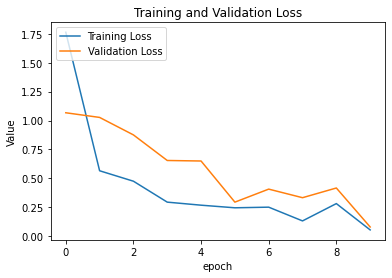

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Value')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

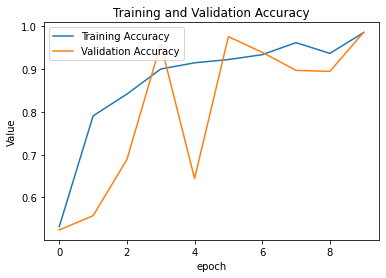

In [ ]:

plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Value')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

# Predict

Saving 1yeoLbmp4alVOtFv.png to 1yeoLbmp4alVOtFv.png
[[1. 0. 0.]]
1yeoLbmp4alVOtFv.png
paper


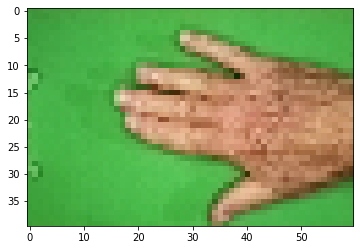

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(img_height,img_width))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(classes)

  print(fn)
  if classes[0][0]==1 and classes[0][1]==0 and classes[0][2]==0:
    print('paper')
  elif classes[0][0]==0 and (classes[0][1]==1 and classes[0][2]==0) :
    print('rock')
  else:
    print('scissors')

# Manually Save Model

In [ ]:
from datetime import date
today = date.today()

costum_name = 'best_2'   
model_save_path = '%s/saved_models/%s_%s.h5'%(base_dir, today,costum_name)

In [ ]:
print('Saving Model At {}...'.format(model_save_path))
model.save_weights(model_save_path)

Saving Model At /content/gdrive/My Drive/rockpaperscissors/saved_models/2020-10-20_best_2.h5...


# Manually Load Model

In [ ]:
model.load_weights('/content/gdrive/My Drive/rockpaperscissors/saved_models/2020-10-18_best.h5')  

# Identity

Alexander Manuel S

[Dicoding Profile](https://www.dicoding.com/users/lexmanuel)

[lexmanuel.com](lexmanuel.com)